In [ ]:
import numpy as np #operações vetorizadas
import matplotlib.pyplot as plt #plots e afins
import time #para registar o tempo

# DFT
$Re(X_{k}) = \sum_{n=0}^{N-1} x_{n}\cos(\theta) + jx_{n}\sin(\theta)$ \\
$Im(X_{k}) = \sum_{n=0}^{N-1} jx_{n}\cos(\theta) - x_{n}\sin(\theta)$ \\
$\theta = 2 \pi \frac{k}{N} n$

## Vetorizada

In [ ]:
def optDFT(signal_r, signal_i, shift=True):
  '''
  :param signal_r: parte real do sinal
  :param signal_i: parte imaginária do sinal
  :param shift: flag para aplicar ou não shift na DFT
  :return parte real e imaginária do espectro do sinal
  '''
  N = len(signal_r) #número total de amostras

  #garante que os sinais são no formato 1xN
  signal_r = np.atleast_2d(signal_r)
  signal_i = np.atleast_2d(signal_i)

  #Realiza o shift (se True)
  if shift:
    u = np.arange(0,N,1) #vetor com componentes da frequência para o shift
    signal_r = signal_r*(-1)**u #shift na parte real
    signal_i = signal_i*(-1)**u #shift na parte imaginária

  #DFT vetorizada
  n = np.arange(0,N,1) #intervalo 0:N-1
  kx, ky = np.meshgrid(n, n) #matriz 2D com o intervalo 0:N-1
  theta = 2*np.pi*ky*n/N #theta = (2*pi*u/N)*(n-1)
  dft_r = signal_r@np.cos(theta) + signal_i@np.sin(theta) #r[n]*cos(theta) + fi[n]*sen(theta)
  dft_i = signal_i@np.cos(theta) - signal_r@np.sin(theta) #j{-fr[n]*sen(theta) + fi[n]*cos(theta)}
  return dft_r.ravel(), dft_i.ravel()

t_proc = 0.1550436019897461s


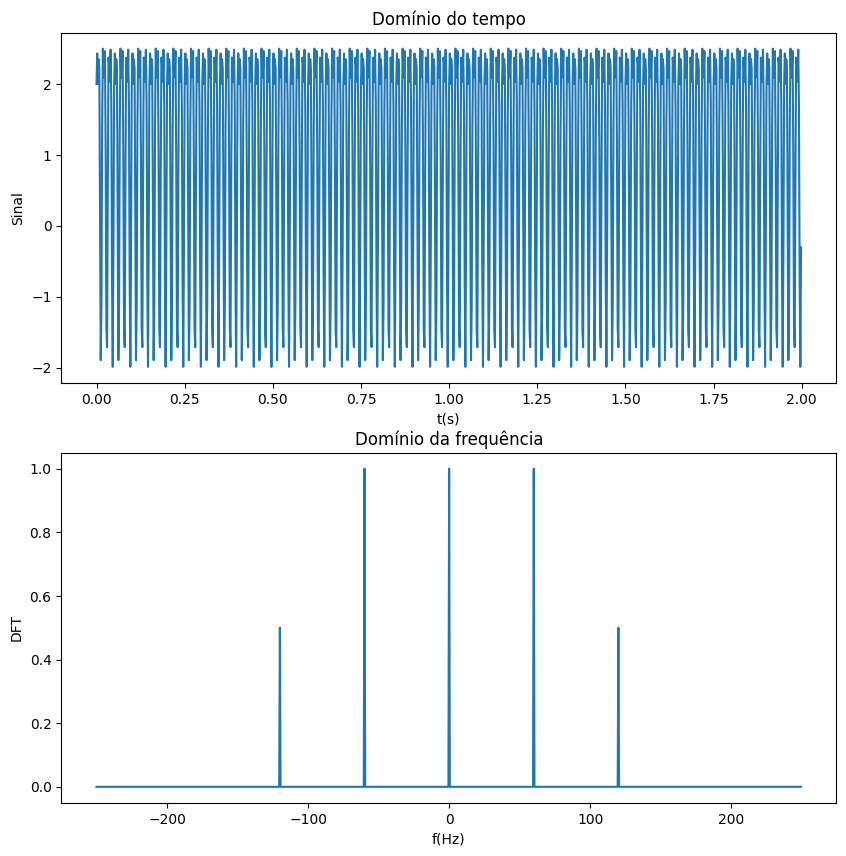

In [ ]:
#definindo senoide arbitrária para testar a DFT vetorizada
f = 60
A = 2
init = 0
end = 2
n_samples = 1000
Ts = (end-init)/n_samples #período de amostragem
t = np.arange(init, end, Ts) #vetor de tempos do sinal
fs = 1/Ts #frequência de amostragem
delta_f = fs/n_samples #resolução do espectro
esc_freq = np.arange(-fs/2, fs/2, delta_f) #escala de frequências
sig_r = 1+A*np.sin(2*np.pi*f*t) + (A/2)*np.cos(2*np.pi*2*f*t) #parte real do sinal
sig_i = np.zeros_like(sig_r) #parte imaginária do sinal

#Rodando a DFT vetorizada
t_init = time.time()
optDFT_r, optDFT_i = optDFT(sig_i, sig_r)
print(f't_proc = {time.time()-t_init}s')
optDFT_vect = np.sqrt(optDFT_r**2 + optDFT_i**2)/n_samples #módulo

#plot
plt.figure(1, figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t, sig_r)
plt.title('Domínio do tempo')
plt.xlabel('t(s)')
plt.ylabel('Sinal')

plt.subplot(2,1,2)
plt.plot(esc_freq, optDFT_vect)
plt.title('Domínio da frequência')
plt.xlabel('f(Hz)')
plt.ylabel('DFT')
plt.show()

## Parcialmente Vetorizada

In [ ]:
def vectDFT(signal_r, signal_i, shift=True):
  '''
  :param signal_r: parte real do sinal
  :param signal_i: parte imaginária do sinal
  :param shift: flag para aplicar ou não shift na DFT
  :return parte real e imaginária do espectro do sinal
  '''
  N = len(signal_r) #número total de amostras
  dft_r = np.zeros((N,1)) #vetor para armazenar os valores reais do espectro
  dft_i = np.zeros_like(dft_r) #vetor para armazenar os valores imaginários do espectro

  #Realiza o shift (se True)
  if shift:
    u = np.arange(0,N,1) #vetor com componentes da frequência para o shift
    signal_r = signal_r*(-1)**u #shift na parte real
    signal_i = signal_i*(-1)**u #shift na parte imaginária

  #DFT parcialmente vetorizada
  n = np.arange(0,N,1) #vetor com os índices das amostras até N
  for k in n:
    theta = 2*np.pi*k*n/N #theta = (2*pi*u/N)*(n-1)
    sum_r = signal_r*np.cos(theta) + signal_i*np.sin(theta) #r[n]*cos(theta) + fi[n]*sen(theta)
    sum_i = signal_i*np.cos(theta) - signal_r*np.sin(theta) #j{-fr[n]*sen(theta) + fi[n]*cos(theta)}
    dft_r[k] = np.sum(sum_r) #componente real é a soma real
    dft_i[k] = np.sum(sum_i) #componente im. é a soma im.

  return dft_r, dft_i

t_proc = 0.2642381191253662s


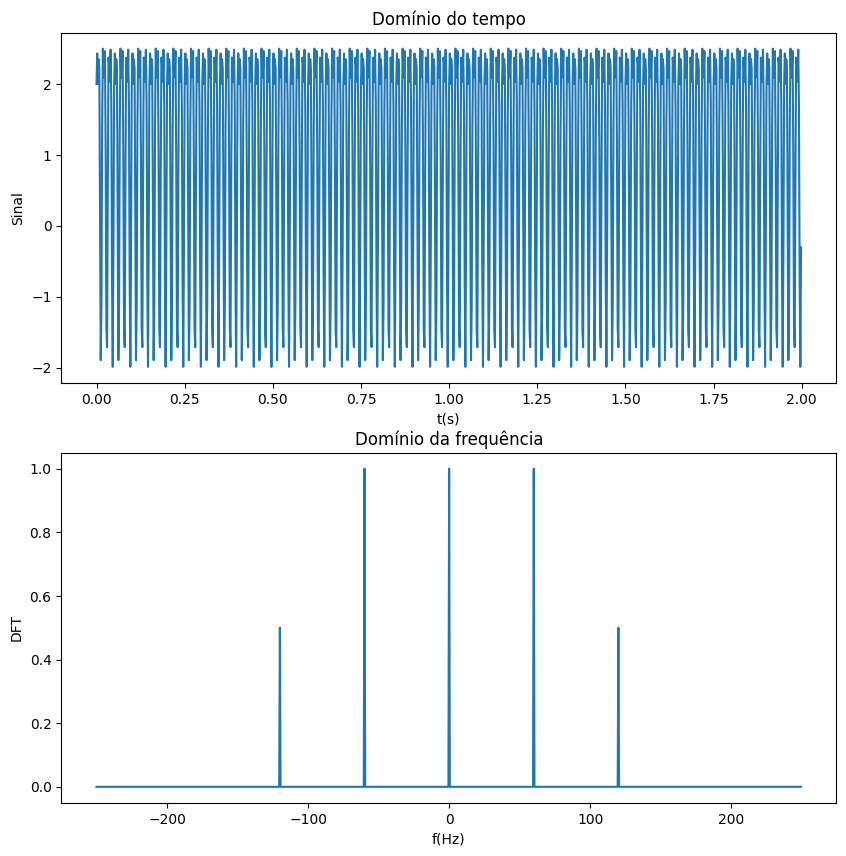

In [ ]:
#definindo senoide arbitrária para testar a DFT vetorizada
f = 60
A = 2
init = 0
end = 2
n_samples = 1000
Ts = (end-init)/n_samples #período de amostragem
t = np.arange(init, end, Ts) #vetor de tempos do sinal
fs = 1/Ts #frequência de amostragem
delta_f = fs/n_samples #resolução do espectro
esc_freq = np.arange(-fs/2, fs/2, delta_f) #escala de frequências
sig_r = 1+A*np.sin(2*np.pi*f*t) + (A/2)*np.cos(2*np.pi*2*f*t) #parte real do sinal
sig_i = np.zeros_like(sig_r) #parte imaginária do sinal

#Rodando a DFT parcialmente vetorizada
t_init = time.time()
DFT_r, DFT_i = vectDFT(sig_i, sig_r)
print(f't_proc = {time.time()-t_init}s')
DFT_vect = np.sqrt(DFT_r**2 + DFT_i**2)/n_samples #módulo

#plot
plt.figure(1, figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t, sig_r)
plt.title('Domínio do tempo')
plt.xlabel('t(s)')
plt.ylabel('Sinal')

plt.subplot(2,1,2)
plt.plot(esc_freq, DFT_vect)
plt.title('Domínio da frequência')
plt.xlabel('f(Hz)')
plt.ylabel('DFT')
plt.show()

## Iterativa

In [ ]:
def iterDFT(signal_r, signal_i, shift=True):
  '''
  :param signal_r: parte real do sinal
  :param signal_i: parte imaginária do sinal
  :param shift: flag para aplicar ou não shift na DFT
  :return parte real e imaginária do espectro do sinal
  '''
  N = len(signal_r) #número total de amostras
  dft_r = np.zeros((N,1)) #vetor para armazenar os valores reais do espectro
  dft_i = np.zeros_like(dft_r) #vetor para armazenar os valores imaginários do espectro

  #Realiza o shift (se True)
  if shift:
    u = np.arange(0,N,1) #vetor com componentes da frequência para o shift
    signal_r = signal_r*(-1)**u #shift na parte real
    signal_i = signal_i*(-1)**u #shift na parte imaginária

  #DFT iterativa
  n = np.arange(0,N,1) #vetor com os índices das amostras até N
  for k in n:
    curr_sum_r = 0 #variável para armazenar a soma iterativa da parte real
    curr_sum_i = 0 #variável para armazenar a soma iterativa da parte imaginária

    for i in n:
      theta = 2*np.pi*k*i/N #theta = (2*pi*u/N)*(n-1)
      curr_sum_r += signal_r[i]*np.cos(theta) + signal_i[i]*np.sin(theta) #r[n]*cos(theta) + fi[n]*sen(theta)
      curr_sum_i += signal_i[i]*np.cos(theta) - signal_r[i]*np.sin(theta) #j{-fr[n]*sen(theta) + fi[n]*cos(theta)}

    dft_r[k] = curr_sum_r #componente real é a soma real
    dft_i[k] = curr_sum_i #componente im. é a soma im.

  return dft_r, dft_i

t_proc = 10.588047742843628s


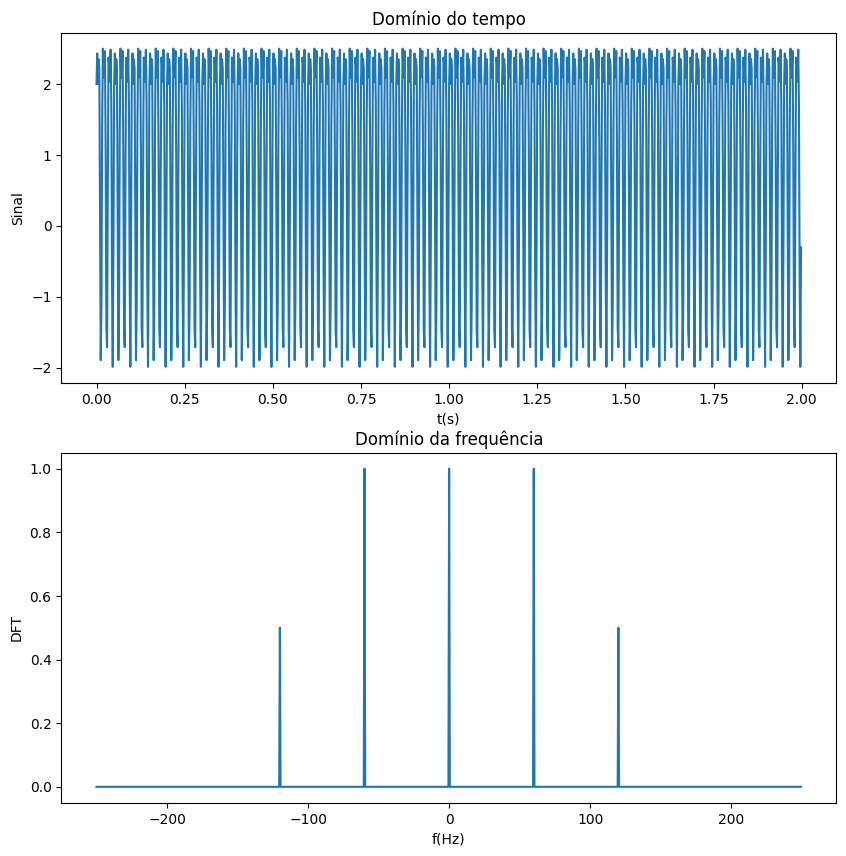

In [ ]:
#definindo senoide arbitrária para testar a DFT iterativa
f = 60
A = 2
init = 0
end = 2
n_samples = 1000
Ts = (end-init)/n_samples #período de amostragem
t = np.arange(init, end, Ts) #vetor de tempos do sinal
fs = 1/Ts #frequência de amostragem
delta_f = fs/n_samples #resolução do espectro
esc_freq = np.arange(-fs/2, fs/2, delta_f) #escala de frequências
sig_r = 1+A*np.sin(2*np.pi*f*t) + (A/2)*np.cos(2*np.pi*2*f*t) #parte real do sinal
sig_i = np.zeros_like(sig_r) #parte imaginária do sinal

#Rodando a DFT iterativa
t_init = time.time()
DFT_r_it, DFT_i_it = iterDFT(sig_i, sig_r)
print(f't_proc = {time.time()-t_init}s')
DFT_it = np.sqrt(DFT_r_it**2 + DFT_i_it**2)/n_samples #módulo

#plot
plt.figure(2, figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t, sig_r)
plt.title('Domínio do tempo')
plt.xlabel('t(s)')
plt.ylabel('Sinal')

plt.subplot(2,1,2)
plt.plot(esc_freq, DFT_it)
plt.title('Domínio da frequência')
plt.xlabel('f(Hz)')
plt.ylabel('DFT')
plt.show()

# FFT


t_proc = 0.015079259872436523s


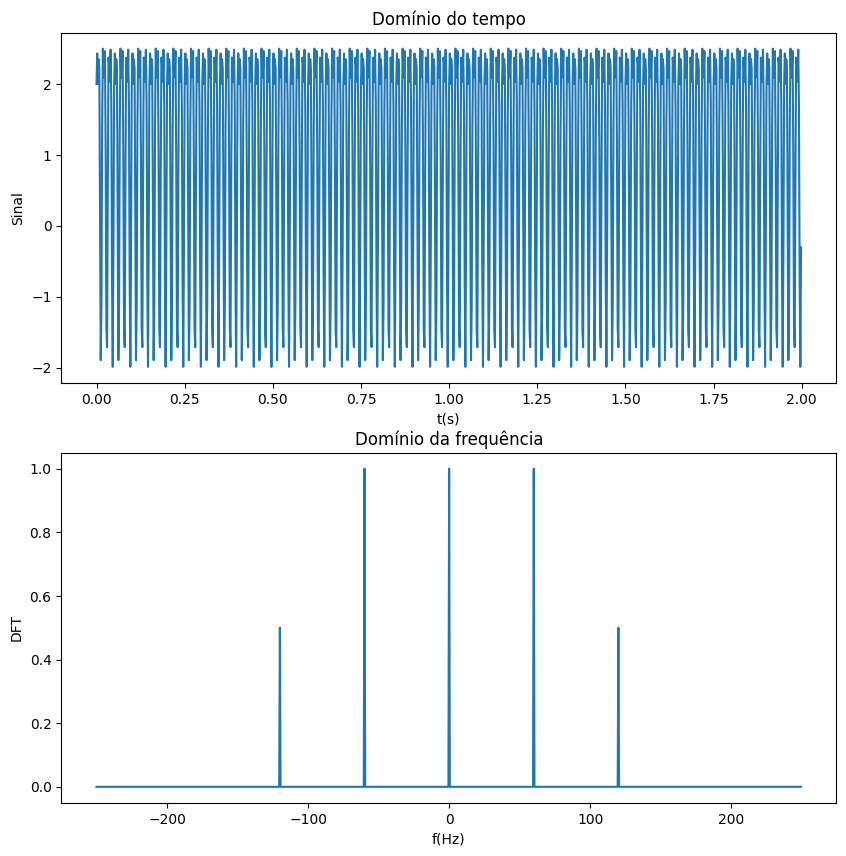

In [ ]:
#definindo senoide arbitrária para testar a FFT numpy
f = 60
A = 2
init = 0
end = 2
n_samples = 1000
Ts = (end-init)/n_samples #período de amostragem
t = np.arange(init, end, Ts) #vetor de tempos do sinal
fs = 1/Ts #frequência de amostragem
delta_f = fs/n_samples #resolução do espectro
esc_freq = np.arange(-fs/2, fs/2, delta_f) #escala de frequências
sig_r = 1+A*np.sin(2*np.pi*f*t) + (A/2)*np.cos(2*np.pi*2*f*t) #parte real do sinal
sig_i = np.zeros_like(sig_r, dtype=np.complex128) #parte imaginária do sinal

#Rodando FFT numpy
t_init = time.time()
DFT_np = np.fft.fft(sig_r+sig_i) #computa FFT
DFT_np = np.fft.fftshift(DFT_np) #shift na FFT
print(f't_proc = {time.time() - t_init}s')
DFT_np = np.abs(DFT_np)/n_samples #módulo da FFT

#plot
plt.figure(3, figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t, sig_r)
plt.title('Domínio do tempo')
plt.xlabel('t(s)')
plt.ylabel('Sinal')

plt.subplot(2,1,2)
plt.plot(esc_freq, DFT_np)
plt.title('Domínio da frequência')
plt.xlabel('f(Hz)')
plt.ylabel('DFT')
plt.show()

## Comparação

In [ ]:
vect_np = optDFT_vect.ravel() - DFT_np.ravel() #empilha as matrizes e subtrai
print(f'VECT x numpy = {np.sum(vect_np)}')
partvect_np = DFT_vect.ravel() - DFT_np.ravel() #empilha as matrizes e subtrai
print(f'PART VECT x numpy = {np.sum(partvect_np)}')
iter_np = DFT_it.ravel() - DFT_np.ravel() #empilha as matrizes e subtrai
print(f'ITER x numpy = {np.sum(iter_np)}')

VECT x numpy = 6.0228245742055045e-12
PART VECT x numpy = 4.706210972923079e-12
ITER x numpy = 4.705143759209643e-12
